## Gaussian Distribution


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [11]:

data=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [13]:
data[data['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [14]:
def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [15]:
data['Age']=impute_na(data,'Age')

In [16]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

## QQ-Plot


In [19]:
def qq_plot(df,var):
    plt.subplot(1,2,1)
    df[var].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[var],dist='norm',plot=plt)

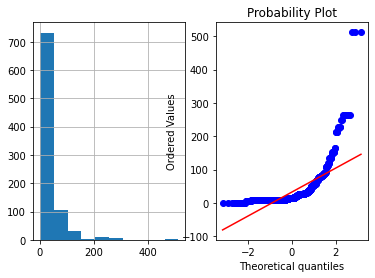

In [21]:
qq_plot(data, 'Fare')

## Log Transformation 

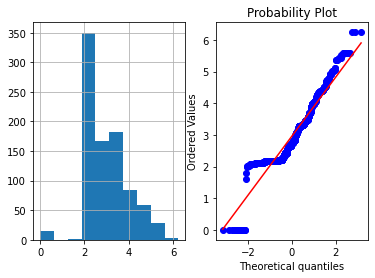

In [24]:
data['Fare_log']=np.log(data['Fare']+1)
qq_plot(data, 'Fare_log')

## BOXCOX 

In [27]:
data['Fare_boxcox'], param = stats.boxcox(data.Fare+1) # you can vary the exponent as needed

#print('Optimal lambda: ', param)

impute_na(data, 'Fare_boxcox')

0      1.906724
1      3.497640
2      1.970459
3      3.304258
4      1.981680
5      2.017180
6      3.288577
7      2.670118
8      2.214698
9      2.918516
10     2.505135
11     2.832065
12     1.981680
13     2.945638
14     1.964027
15     2.474608
16     2.896391
17     2.326029
18     2.558462
19     1.904255
20     2.817470
21     2.326029
22     1.979824
23     3.032697
24     2.670118
25     2.948115
26     1.904255
27     4.298181
28     1.966304
29     1.967813
         ...   
861    2.237990
862    2.815567
863    3.481651
864    2.326029
865    2.326029
866    2.371863
867    3.270784
868    2.100626
869    2.214698
870    1.967813
871    3.297391
872    1.643571
873    2.061765
874    2.761502
875    1.904255
876    2.126332
877    1.967813
878    1.967813
879    3.596981
880    2.817470
881    1.967813
882    2.173733
883    2.172590
884    1.886735
885    2.896391
886    2.326029
887    2.916885
888    2.745246
889    2.916885
890    1.954457
Name: Fare_boxcox_random